In [74]:
# DATA LOADING

from utils.data_loader.mobility_data_loader import mobility_data_loader 

# Process whole dataset in to intermediate form
dataframe = mobility_data_loader('20240101','20240103')

1
20240101 dataframe shape
(85653, 18)
2
20240102 dataframe shape
(84857, 18)
3
20240103 dataframe shape
(85335, 18)


In [75]:
import pandas as pd
parent = []

for date,df in dataframe.items():
    print(date,df.shape)
    parent.append(df)
print(len(parent))
parent_df = pd.concat(parent,ignore_index=True)
print(parent_df.shape)

20240101 (85653, 25)
20240102 (84857, 25)
20240103 (85335, 25)
3
(255845, 25)


In [76]:
df = parent_df

In [77]:
from utils.resident.resident_classification import keep_resident_travels_in_df
df = keep_resident_travels_in_df(df)
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_1460\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_1460\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_1460\74756500.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



(4001, 25)

In [78]:
import pandas as pd
# Filter data that only was after earthquake time

earthquake_time = pd.to_datetime('2024-01-01 16:10:00')

# Keep travels that only are after the earthquake
df = df[(df['depart_time_o'] > earthquake_time)]
df.shape

(3259, 25)

In [79]:
from utils.resident.city_classification import city_classification
df = city_classification(df)
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_1460\3488089027.py:2: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

E:\IRP_noto_earthquake\utils\data_filter\data_home_filter_by_region.py:43: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City' 'Suzu City'
 'Suzu City

(3259, 26)

In [80]:
display(df.head())

,common_id,mesh_o,latitude_o,longitude_o,arrive_time_o,stay_time_o,depart_time_o,move_time,mode,mesh_d,...,poi_work,purpose_flg,latitude_h,longitude_h,latitude_w,longitude_w,distance_oh,distance_dh,distance_od,home_city
45,001de71e-04b1-447a-a637-e045aee10c23,55364738131,37.027978,136.975557,2024-01-01 16:36:07,73,2024-01-01 17:49:22,23,walk,55364738134,...,NaN,6,37.043458,136.966438,<NA>,<NA>,1.902138,1.885995,0.23,Nanao City
152,0074cea7e45281ddc54de84b92756143,56360772313,37.397662,136.901326,2024-01-01 16:46:59,83,2024-01-01 18:10:19,801,car,56360772131,...,5.636077e+10,6,37.394292,136.901438,37.394292,136.901438,0,0.012412,0.39,Wajima City
221,00a0a8847001f885782f7e55b57861ad,55364601234,37.003311,136.771556,2023-12-31 13:54:50,1678,2024-01-01 17:52:22,9,walk,55364601234,...,5.536460e+10,6,37.001875,136.766312,37.001875,136.766312,0,0,0.02,Shika-machi
230,00a7eb7b743c5e4bcce8b28721c6bf48,55370061341,36.723370,137.017039,2024-01-01 19:34:24,22,2024-01-01 19:56:21,264,car,55364759134,...,5.536476e+10,5,37.043542,136.966313,37.043542,136.966313,35.886214,2.061265,35.84,Nanao City
361,01115f3a53ec4b347b8e65b6ac070563,55364725444,37.024873,136.948808,2024-01-01 09:26:28,459,2024-01-01 17:05:15,30,car,55364725443,...,NaN,3,37.045042,136.940188,<NA>,<NA>,2.369594,2.387377,0.11,Nanao City


In [81]:
# Replace NaN values in the 'mode' column with 'undetected'
df['mode'] = df['mode'].fillna('undetected')

# Verify the replacement
mode_counts = df['mode'].value_counts()
print(mode_counts)


mode
car           2175
walk           921
train           88
undetected      42
bike            33
Name: count, dtype: int64


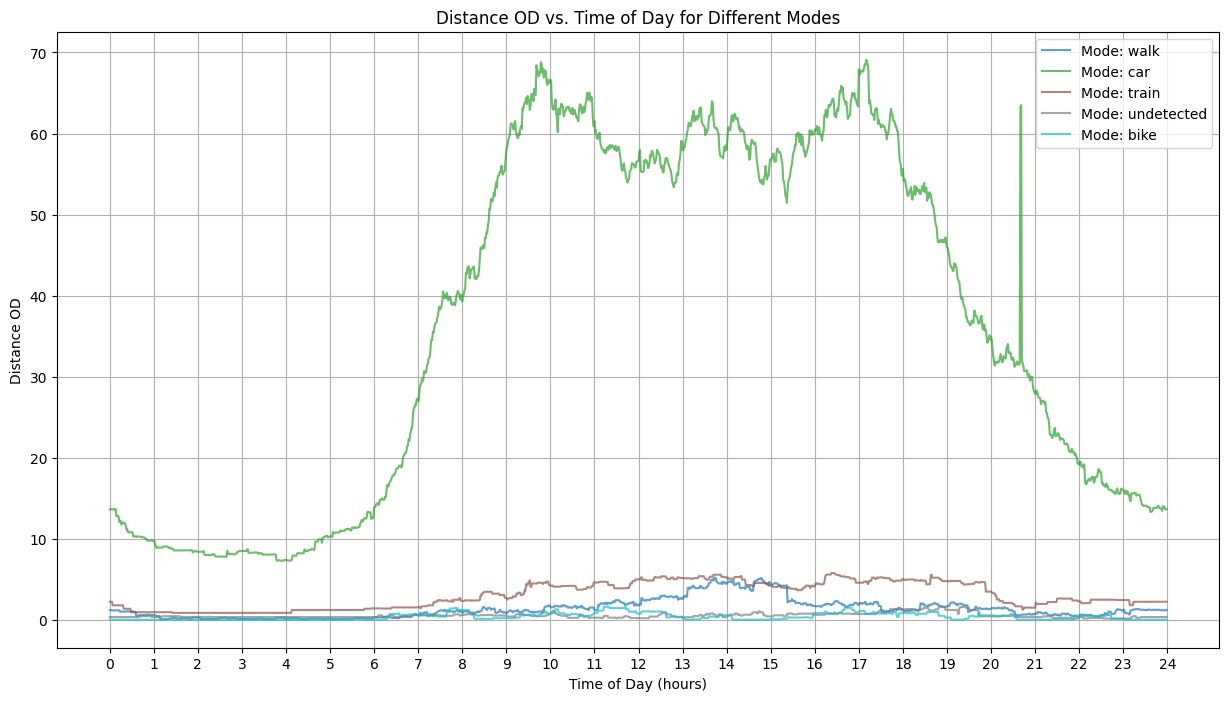

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Convert 'arrive_time_o' and 'depart_time_o' to datetime
df['depart_time_o'] = pd.to_datetime(df['depart_time_o'])
df['arrive_time_d'] = pd.to_datetime(df['arrive_time_d'])

# Calculate the start and end time in minutes from midnight
df['start_minute'] = df['depart_time_o'].dt.hour * 60 + df['depart_time_o'].dt.minute
df['end_minute'] = df['arrive_time_d'].dt.hour * 60 + df['arrive_time_d'].dt.minute

# Create a time array for the x-axis
time_of_day = np.arange(24 * 60) / 60

# Get unique mode values
modes = df['mode'].unique()

# Plotting setup
plt.figure(figsize=(15, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(modes)))  # Use tab10 colormap to get distinct colors

# Plotting for each mode
for i, mode in enumerate(modes):
    # Filter dataframe by mode
    mode_df = df[df['mode'] == mode]
    
    # Create an empty array for the distance traveled at each minute of the day
    distance_per_minute = np.zeros(24 * 60)
    
    # Distribute the travel distances over the corresponding minutes
    for _, row in mode_df.iterrows():
        start = row['start_minute']
        end = row['end_minute']
        distance = row['distance_od']
        if start == end:
            continue  # Skip cases where start and end are the same
        if end > start:
            distance_per_minute[start:end] += distance / (end - start)
        else:
            # Handle cases where the trip spans midnight
            distance_per_minute[start:] += distance / (1440 - start + end)
            distance_per_minute[:end] += distance / (1440 - start + end)
    
    # Plotting
    plt.plot(time_of_day, distance_per_minute, color=colors[i], alpha=0.7, label=f'Mode: {mode}')

plt.xlabel('Time of Day (hours)')
plt.ylabel('Distance OD')
plt.title('Time distribution of travels')
plt.xticks(np.arange(0, 25, 1))
plt.legend()
plt.grid(True)
plt.show()

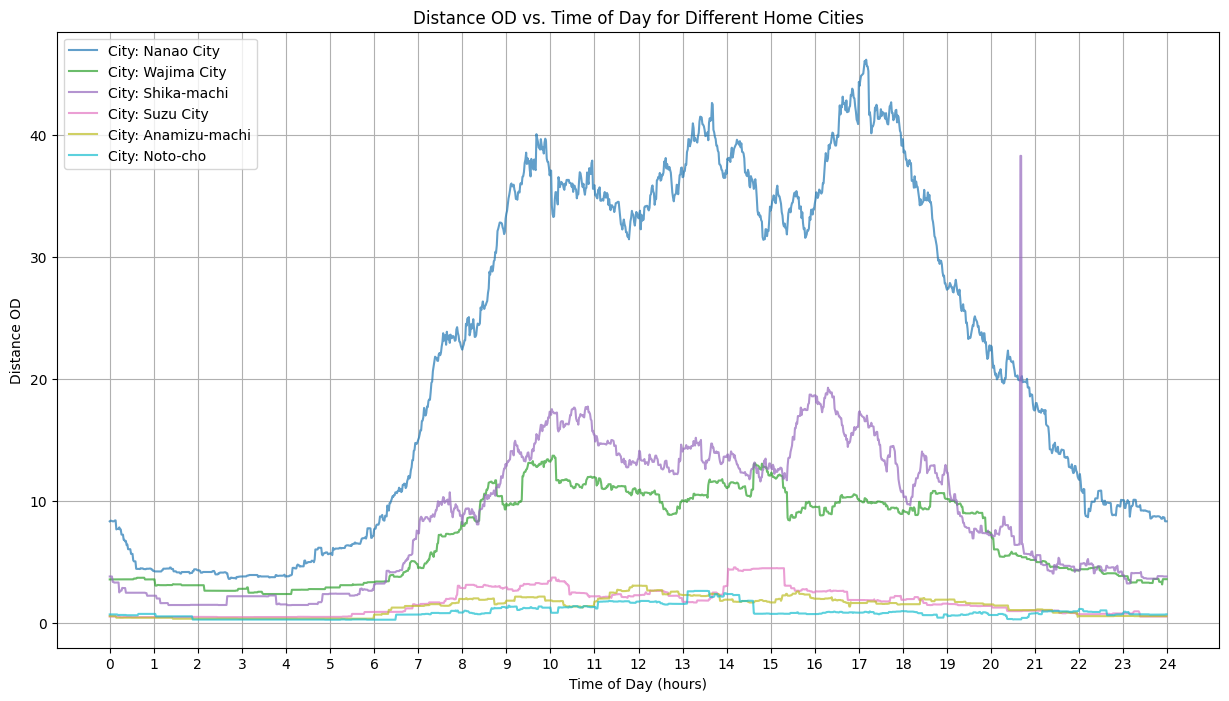

In [68]:
# Homw City

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already defined and contains the necessary columns

# Convert 'arrive_time_o' and 'depart_time_o' to datetime
df['depart_time_o'] = pd.to_datetime(df['depart_time_o'])
df['arrive_time_d'] = pd.to_datetime(df['arrive_time_d'])

# Calculate the start and end time in minutes from midnight
df['start_minute'] = df['depart_time_o'].dt.hour * 60 + df['depart_time_o'].dt.minute
df['end_minute'] = df['arrive_time_d'].dt.hour * 60 + df['arrive_time_d'].dt.minute

# Create a time array for the x-axis
time_of_day = np.arange(24 * 60) / 60

# Get unique home city values
home_cities = df['home_city'].unique()

# Plotting setup
plt.figure(figsize=(15, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(home_cities)))  # Use tab10 colormap to get distinct colors

# Plotting for each home city
for i, city in enumerate(home_cities):
    # Filter dataframe by home city
    city_df = df[df['home_city'] == city]
    
    # Create an empty array for the distance traveled at each minute of the day
    distance_per_minute = np.zeros(24 * 60)
    
    # Distribute the travel distances over the corresponding minutes
    for _, row in city_df.iterrows():
        start = row['start_minute']
        end = row['end_minute']
        distance = row['distance_od']
        if start == end:
            continue  # Skip cases where start and end are the same
        if end > start:
            distance_per_minute[start:end] += distance / (end - start)
        else:
            # Handle cases where the trip spans midnight
            distance_per_minute[start:] += distance / (1440 - start + end)
            distance_per_minute[:end] += distance / (1440 - start + end)
    
    # Plotting
    plt.plot(time_of_day, distance_per_minute, color=colors[i], alpha=0.7, label=f'City: {city}')

plt.xlabel('Time of Day (hours)')
plt.ylabel('Distance OD')
plt.title('Distance OD vs. Time of Day for Different Home Cities')
plt.xticks(np.arange(0, 25, 1))
plt.legend()
plt.grid(True)
plt.show()


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


df = pd.DataFrame(data)
df['depart_time_o'] = pd.to_datetime(df['depart_time_o'])
df['arrive_time_d'] = pd.to_datetime(df['arrive_time_d'])
df['start_minute'] = df['depart_time_o'].dt.hour * 60 + df['depart_time_o'].dt.minute
df['end_minute'] = df['arrive_time_d'].dt.hour * 60 + df['arrive_time_d'].dt.minute

# Create a time array for the x-axis
time_of_day = np.arange(24 * 60) / 60

# Get unique home city values
home_cities = df['home_city'].unique()

# Loop through each day
for day in range(1, 32):  # Adjust the range based on your actual data
    # Filter data for the current day
    day_df = df[df['arrive_time_d'].dt.day == day]
    
    # Create a figure for the plot
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_xlabel('Time of Day (hours)')
    ax.set_ylabel('Distance OD')
    ax.set_title(f'Distance OD vs. Time of Day for Different Home Cities - Day {day}')
    ax.set_xticks(np.arange(0, 25, 1))
    ax.grid(True)
    
    # Plot for each home city
    for city in home_cities:
        city_df = day_df[day_df['home_city'] == city]
        distance_per_minute = np.zeros(24 * 60)
        
        for _, row in city_df.iterrows():
            start = row['start_minute']
            end = row['end_minute']
            distance = row['distance_od']
            
            if start == end:
                continue  # Skip cases where start and end are the same
            
            if end > start:
                distance_per_minute[start:end] += distance / (end - start)
            else:
                distance_per_minute[start:] += distance / (1440 - start + end)
                distance_per_minute[:end] += distance / (1440 - start + end)
        
        ax.plot(time_of_day, distance_per_minute, label=f'City: {city}')
    
    ax.legend()
    
    # Save the plot as an image file
    plt.savefig(f'distance_od_day_{day}.png')  # Adjust the filename as needed
    plt.close()  # Close the figure to free up memory

print("Plots saved successfully.")


Plots saved successfully.
